# Introduction



Machine learning is essentially concerned with extracting models from data, often (though not exclusively) using them for the purpose of prediction. As such, it is inseparably connected with uncertainty. Indeed, learning in the sense of generalizing beyond the data seen so far is necessarily based on a process of induction, i.e., replacing specific observations by general models of the data-generating process. Such models are never provably correct but only hypothetical and therefore uncertain, and the same holds true for the predictions produced by a model. In addition to the uncertainty inherent in inductive inference, other sources of uncertainty exist, including incorrect model assumptions and noisy or imprecise data.

Needless to say, a trustworthy representation of uncertainty is desirable and should be considered as a key feature of any machine learning method, all the more in safety-critical application domains such as medicine ({cite:t}`yang_ur09,lamb_rc11`)or socio-technical systems ({cite:t}`vars_es16,vars_ot16`). Besides, uncertainty is also a major concept within machine learning methodology itself; for example, the principle of uncertainty reduction plays a key role in settings such as active learning({cite:t}`agga_al14,vmpub392`), or in concrete learning algorithms such as decision tree induction ({cite:t}`mitc_tn80`). 


Traditionally, uncertainty is modeled in a probabilistic way, and indeed, in fields like statistics and machine learning, probability theory has always been perceived as the ultimate tool for uncertainty handling. Without questioning the probabilistic approach in general, one may argue that conventional approaches to probabilistic modeling, which are essentially based on capturing knowledge in terms of a single probability distribution, fail to distinguish two inherently different sources of uncertainty, which are often referred to as aleatoric and epistemic uncertainty ({cite:t}`hora_aa96,kiur_ao09`). Roughly speaking, aleatoric (statistical) uncertainty refers to the notion of randomness, that is, the variability in the outcome of an experiment which is due to inherently random effects. The prototypical example of aleatoric uncertainty is coin flipping or quantum mechanics: The data-generating process in this type of experiment has a stochastic component that cannot be reduced by any additional source of information (except Laplace's demon). Consequently, even the best model of this process will only be able to provide probabilities for the two possible outcomes, heads and tails, but no definite answer. As opposed to this, epistemic (systematic) uncertainty refers to uncertainty caused by a lack of knowledge (about the best model). In other words, it refers to the ignorance (cf.\ Sections \ref{sec:rlk} and \ref{sec:aproi}) of the agent or decision maker, and hence to the epistemic state of the agent instead of any underlying random phenomenon. As opposed to uncertainty caused by randomness, uncertainty caused by ignorance can in principle be reduced on the basis of additional information. For example, what does the word ``kichwa'' mean in the Swahili language, head or tail? The possible answers are the same as in coin flipping, and one might be equally uncertain about which one is correct. Yet, the nature of uncertainty is different, as one could easily get rid of it. 
In other words, epistemic uncertainty refers to the reducible part of the (total) uncertainty, whereas aleatoric uncertainty refers to the irreducible part.




    
    







:::{figure-md} image1
<div style="text-align: center;">
  <img src="pic-keyboard.jpeg" alt="typewriter keyboard" width="33%" style="display: inline-block; margin-right: 20px;">
  <img src="pic-stone.jpeg" alt="stone wall" width="33%" style="display: inline-block; margin-left: 20px;">
</div>

Predictions by EfficientNet ({cite:t}`tan_er19`) on test images from ImageNet: For the left image, the neural network predicts "typewriter keyboard" with certainty 83.14%, for the right image "stone wall" with certainty 87.63%.





In machine learning, where the agent is a learning algorithm, the two sources of uncertainty are usually not distinguished. In some cases, such a distinction may indeed appear unnecessary. For example, if an agent is forced to make a decision or prediction, the source of its uncertainty---aleatoric or epistemic---might actually be irrelevant. This argument is often put forward by Bayesians in favor of a purely probabilistic approach (and classical Bayesian decision theory). One should note, however, that this scenario does not always apply. Instead, the ultimate decision can often be refused or delayed, like in classification with a reject option ({cite:t}`chow_oo70,hell_tn70`), or actions can be taken that are specifically directed at reducing uncertainty, like in active learning ({cite:t}`agga_al14`).





Motivated by such scenarios, and advocating a trustworthy representation of uncertainty in machine learning, ({cite:t}`mpub272`) explicitly refer to the distinction between aleatoric and epistemic uncertainty. They propose a quantification of these uncertainties and show the usefulness of their approach in the context of medical decision making. A very similar motivation is given by ({cite:t}`kull_rm14`) in the context of their work on reliability maps. They distinguish between a predicted probability score and the uncertainty in that prediction, and illustrate this distinction with an example from weather forecasting\footnote{The semantic interpretation of probability is arguably not very clear in examples of that kind: What exactly does it mean to have a 50\% chance of rain for the next day? This is not important for the point we want to make here, however.}:  "... a weather forecaster can be very certain that the chance of rain is 50 %; or her best
estimate at 20 % might be very uncertain due to lack of data." Roughly, the 50% chance corresponds to what one may understand as aleatoric uncertainty, whereas the uncertainty in the 20% estimate is akin to the notion of epistemic uncertainty. On the more practical side, ({cite:t}`vars_ot16`) give an example of a recent accident of a self-driving car, which led to the death of the driver (for the first time after 130 million miles of testing). They explain the car's failure by the extremely rare circumstances, and emphasize “the
importance of epistemic uncertainty or “uncertainty on uncertainty” in these AI-assisted
systems.     

Using the weather example presented above, it can be observed how epistemic uncertainty plays an important role in the accuracy of a model. In order to reproduce this example, we first generated random data points that represent the real temperature measurements. Then, we generated two predictions based on the real temperature data points. This is achieved by adding random noise to the data points. The degree of noise is chosen according to the precision of the model: for the model with limited information, the noise is greater than for the informed model.

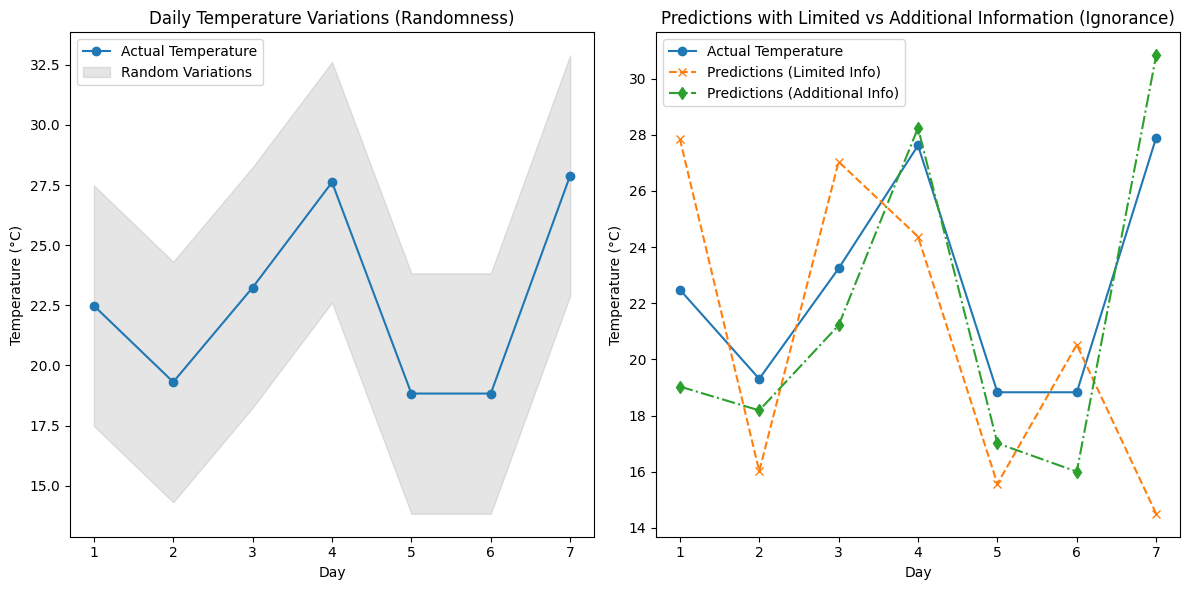

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Simulating daily temperature variations for a week
days = np.arange(1, 8)
actual_temperatures = np.random.normal(20, 5, size=len(days))

# Scenario 1: Predictions based on limited information (high uncertainty due to ignorance)
predictions_limited_info = actual_temperatures + np.random.normal(0, 7, size=len(days))

# Scenario 2: Predictions based on additional information (reduced uncertainty)
predictions_additional_info = actual_temperatures + np.random.normal(0, 2, size=len(days))

# Plotting
plt.figure(figsize=(12, 6))

# Subplot 1: Actual temperatures and random variations
plt.subplot(1, 2, 1)
plt.plot(days, actual_temperatures, label='Actual Temperature', marker='o', linestyle='-')
plt.fill_between(days, actual_temperatures - 5, actual_temperatures + 5, color='gray', alpha=0.2, label='Random Variations')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Variations (Randomness)')
plt.legend()

# Subplot 2: Predictions with limited and additional information
plt.subplot(1, 2, 2)
plt.plot(days, actual_temperatures, label='Actual Temperature', marker='o', linestyle='-')
plt.plot(days, predictions_limited_info, label='Predictions (Limited Info)', marker='x', linestyle='--')
plt.plot(days, predictions_additional_info, label='Predictions (Additional Info)', marker='d', linestyle='-.')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Predictions with Limited vs Additional Information (Ignorance)')
plt.legend()

plt.tight_layout()
plt.show()


More recently, a distinction between aleatoric and epistemic uncertainty has also been advocated in the literature on deep learning ({cite:t}`kend_wu17`), where the limited awareness of neural networks of their own competence has been demonstrated quite nicely. For example, experiments on image classification have shown that a trained model does often fail on specific instances, despite being very confident in its prediction (cf.\ Fig.\ \ref{fig:image}). Moreover, such models are often lacking robustness and can easily be fooled by ``adversarial examples'' ({cite:t}`pape_dk18`): Drastic changes of a prediction may already be provoked by minor, actually unimportant changes of an object. This problem has not only been observed for images but also for other types of data, such as natural language text (cf. \{numref}`text-image`} for an example).

:::{figure-md} text-image
<img src="text-image.jpeg" alt="version-space" width="700">

Adversarial example (right) misclassified by a machine learning model trained on textual data: Changing only a single and apparently not very important word (highlighted in bold font) is enough to turn the correct prediction "negative sentiment" into the incorrect prediction "positive sentiment" ({cite:t}`sato_ia18`).
:::

This book provides an overview of machine learning methods for handling uncertainty, with a specific focus on the distinction between aleatoric and epistemic uncertainty in the common setting of supervised learning. In the next section, we provide a short introduction to this setting and propose a distinction between different sources of uncertainty. 
Section 3 elaborates on modeling epistemic uncertainty. More specifically, it considers set-based modeling and modeling with (probability) distributions as two principled approaches to capturing the learner's  epistemic uncertainty about its main target, that is, the (Bayes) optimal model within the hypothesis space.
Concrete approaches for modeling and handling uncertainty in machine learning are then discussed in Section 4, prior to concluding the Book in Section 5. This  book is an extention of the paper ({cite:t}`H_llermeier_2021`).
.


:::{figure-md} Table-image
<img src="Table-image.jpeg" alt="version-space" width="700">

Notation used throughout the paper.
:::

Table \{numref}`Table-image` summarizes some important notation. Let us note that, for the sake of readability, a somewhat simplified notation will be used for probability measures and associated distribution functions. Most of the time, these will be denoted by $P$ and $P$, respectively, even if they refer to different measures and distributions on different spaces (which will be clear from the arguments). For example, we will write $P( h )$ and $P(y \in \vec{x})$ for the probability (density) of hypotheses $h$ (as elements of the hypothesis space $\mathcal{H}$) and outcomes $y$ (as elements of the output space $\mathcal{Y}$), instead of using different symbols, such as $P_\mathcal{H}( h )$ and $P_\mathcal{Y}(y \in \vec{x})$.

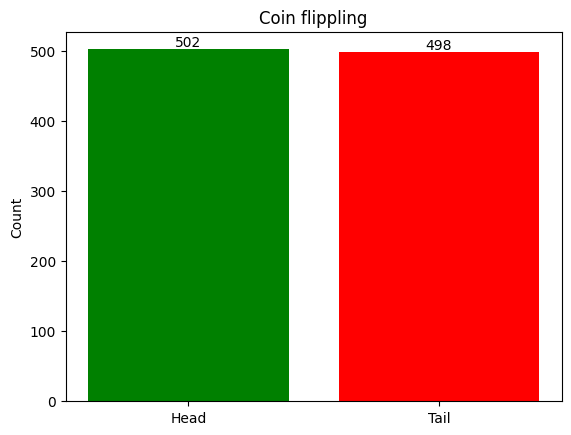

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_experiments = 1000  # Number of times the experiment is conducted

# Random Sampling (0 for head, 1 for tail)
outcomes = np.random.choice([0, 1], size=n_experiments)

# Count of tail and head 
tail_count = np.sum(outcomes)
head_count = n_experiments - tail_count


labels = ['Head', 'Tail']
counts = [tail_count, head_count]

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['green', 'red'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Coin flippling')
ax.bar_label(bars)

# Display the plot
plt.show()


Consequently, even the best model of this process will only be able to provide probabilities for the two possible outcomes, heads and tails, but no definite answer. As mentioned  before, antoher  great example where aleatoric uncertainty is present is quautm  mechanics. Heisenberg's Uncertainty Principle tells us that in quantum mechanics, the position and momentum of a particle cannot be known to $100%$ accuracy simultaneously. In the following example, we show the relationship between position and momentum under Heisenberg's Uncertainty Principle. The mathematical formulation for Heisenberg's Uncertainty Principle is described as follows:



<a id="uncertainty-equation"></a>

$$
\sigma_x \sigma_p \geq \frac{\hbar}{2}
$$

where:

$\sigma_x$ is the standard deviation of position (uncertainty in position), 
$\sigma_p$ is the standard deviation of momentum (uncertainty in momentum), 
$\hbar$ is the reduced Planck's constant, $\hbar = \frac{h}{2\pi}$. 


We will use for simplicity the case $\sigma_x \sigma_p = \frac{\hbar}{2}$. In this example, 100 points were generated for the values between $-5$ and $5$ of momentum and position. Here, the points follow the Gaussian wave packet used in quantum mechanics that resembles the Gaussian distribution.

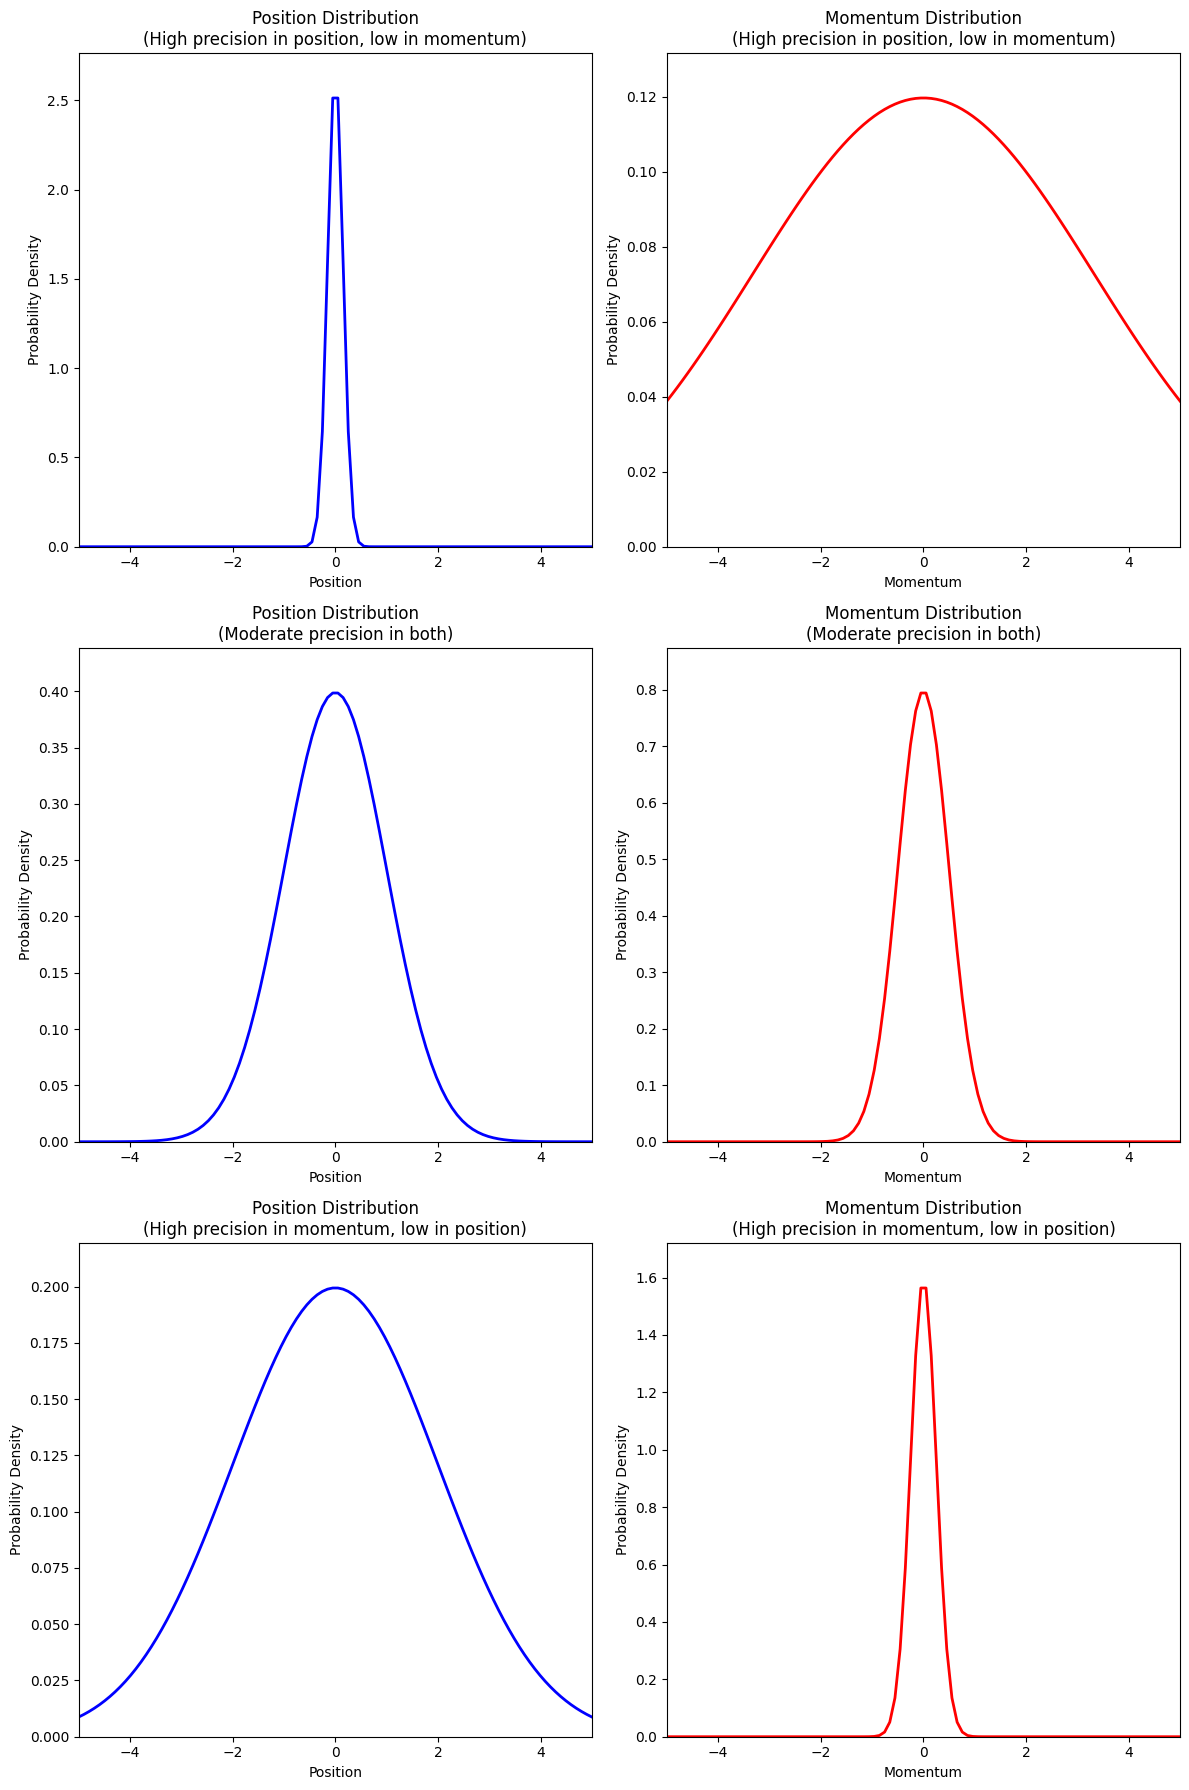

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# reduced Planck's constant 
h_planck = 1.0 #  Here use the value "1" for simplicity .Real value is approx. 1.0545718×10^−34

# Function to calculate Gaussian wave packet in position space
def gaussian_wave_packet(conjugate, sigma_conjugate):
    return (1 / (sigma_conjugate * np.sqrt(2 * np.pi))) * np.exp(-conjugate**2 / (2 * sigma_conjugate**2))

# Generate points to be plotting, a 100 points between -5 and 5.
position = np.linspace(-5, 5, 100)
momentum = np.linspace(-5, 5, 100)

# Set up the figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Different scenarios for uncertainty in position and momentum
scenarios = [
    (0.15, 'High precision in position, low in momentum'),   
    (1.0, 'Moderate precision in both'),                  
    (2.0, 'High precision in momentum, low in position')    
]

# Loop through scenarios
for i, (sigma_position, title) in enumerate(scenarios):
    #  Heisenberg Uncertainty Principle
    sigma_momentum = h_planck / (2 * sigma_position) # Notice that we are analyzing for the case "=" instead of ">=" in the relation.
    
    # Generate the Gaussian wave packet for position
    wave_position = gaussian_wave_packet(position, sigma_position)
    
    # Generate the Gaussian wave packet for momentum
    wave_momentum = gaussian_wave_packet(momentum, sigma_momentum)
    
    # Plot the position probability distribution
    axs[i, 0].plot(position, wave_position, lw=2, color='blue')
    axs[i, 0].set_xlim(-5, 5)
    axs[i, 0].set_ylim(0, max(wave_position) * 1.1)
    axs[i, 0].set_title(f'Position Distribution\n({title})')
    axs[i, 0].set_xlabel('Position')
    axs[i, 0].set_ylabel('Probability Density')
    
    # Plot the momentum probability distribution
    axs[i, 1].plot(momentum, wave_momentum, lw=2, color='red')
    axs[i, 1].set_xlim(-5, 5)
    axs[i, 1].set_ylim(0, max(wave_momentum) * 1.1)
    axs[i, 1].set_title(f'Momentum Distribution\n({title})')
    axs[i, 1].set_xlabel('Momentum')
    axs[i, 1].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


Actually, there has been some research combining Heisenberg's Uncertainty Principle and deep learning. An example of this can be found in ({cite:t}`zhang2022uncertaintyprincipleneuralnetworks`). The idea was to study the accuracy-robustness trade-off in neural networks in the context of adversarial attacks. To do so, the concept of Heisenberg's Uncertainty Principle was extended to neural networks by relating the wave function of quantum mechanics to the loss function of a neural network. Here, it is also differentiated between the lack of accuracy due to neural architecture design and data acquisition (epistemic uncertainty) and intrinsic properties fundamental to deep learning (aleatoric uncertainty).